In [57]:
pip install scikit-learn==1.2.2

Note: you may need to restart the kernel to use updated packages.


# Sentiment Analysis of Online Product Reviews
### Samyuktha Kankanala

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("marketing_sample_for_walmart_com-walmart_product_reviews__20200401_20200630__30k_data.csv")


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29997 entries, 0 to 29996
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Uniq Id               29997 non-null  object 
 1   Crawl Timestamp       29997 non-null  object 
 2   Pageurl               29997 non-null  object 
 3   Website               29997 non-null  object 
 4   Title                 2721 non-null   object 
 5   Rating                29997 non-null  float64
 6   Review                24617 non-null  object 
 7   Reviewer Name         28377 non-null  object 
 8   Review Upvotes        29997 non-null  int64  
 9   Review Downvotes      29997 non-null  int64  
 10  Verified Purchaser    29997 non-null  object 
 11  Recommended Purchase  29997 non-null  object 
 12  Review Date           29997 non-null  object 
 13  Five Star             29903 non-null  float64
 14  Four Star             29903 non-null  float64
 15  Three Star         

In [4]:
data.head()

,Uniq Id,Crawl Timestamp,Pageurl,Website,Title,Rating,Review,Reviewer Name,Review Upvotes,Review Downvotes,Verified Purchaser,Recommended Purchase,Review Date,Five Star,Four Star,Three Star,Two Star,One Star
0,1800878dcfa5255c691f2a87ce8b2869,2020-05-16 17:58:33 +0000,https://www.walmart.com/reviews/product/36907838,walmart.com,NaN,1.0,One star for looking nice. That’s it. After tr...,PJ10,0,0,No,No,7/28/2018,23.0,5.0,1.0,3.0,6.0
1,ac06ca1b77310d539c9a74eed7a8a8e2,2020-04-17 01:05:43 +0000,https://www.walmart.com/reviews/product/708236785,walmart.com,NaN,4.0,Love this phone so far have had it almost a mo...,KelJo,9,3,No,No,11/14/2017,91.0,23.0,13.0,9.0,31.0
2,9c4b10fff4e5e2cc7e2e1bbed76e2220,2020-06-08 10:35:05 +0000,https://www.walmart.com/reviews/product/831078728,walmart.com,NaN,4.0,This TV is absolutely fantastic. This is my th...,TheBigChalupa11,0,0,Yes,No,5/20/2020,32.0,8.0,1.0,0.0,0.0
3,b5a5dc8de9fc0468aab961f097b56091,2020-04-13 03:57:29 +0000,https://www.walmart.com/reviews/product/40712755,walmart.com,NaN,5.0,"Refurb, good shape, good price, does what I wa...",Micalic,0,0,No,No,7/9/2019,418.0,62.0,17.0,1.0,13.0
4,430433b52b882e540c16363d448e012b,2020-05-19 03:52:42 +0000,https://www.walmart.com/reviews/product/46597970,walmart.com,NaN,5.0,Very nice tablet! Looks brand new. Fired right...,jcan74,0,0,No,No,2/11/2020,213.0,57.0,25.0,24.0,87.0


In [5]:
data1 = data[['Uniq Id','Review', 'Review Upvotes','Review Downvotes','Rating']]

In [6]:
data1.head()

,Uniq Id,Review,Review Upvotes,Review Downvotes,Rating
0,1800878dcfa5255c691f2a87ce8b2869,One star for looking nice. That’s it. After tr...,0,0,1.0
1,ac06ca1b77310d539c9a74eed7a8a8e2,Love this phone so far have had it almost a mo...,9,3,4.0
2,9c4b10fff4e5e2cc7e2e1bbed76e2220,This TV is absolutely fantastic. This is my th...,0,0,4.0
3,b5a5dc8de9fc0468aab961f097b56091,"Refurb, good shape, good price, does what I wa...",0,0,5.0
4,430433b52b882e540c16363d448e012b,Very nice tablet! Looks brand new. Fired right...,0,0,5.0


In [7]:
data1.isnull().sum()

Uniq Id                0
Review              5380
Review Upvotes         0
Review Downvotes       0
Rating                 0
dtype: int64

In [8]:
data1.dropna(how='any', inplace=True)


C:\Users\akken\AppData\Local\Temp\ipykernel_45036\368752287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.dropna(how='any', inplace=True)


In [9]:
data1.isnull().sum()

Uniq Id             0
Review              0
Review Upvotes      0
Review Downvotes    0
Rating              0
dtype: int64

### Visualization

#### Creating a bar plot to visualize the average upvotes and downvotes based on different ratings

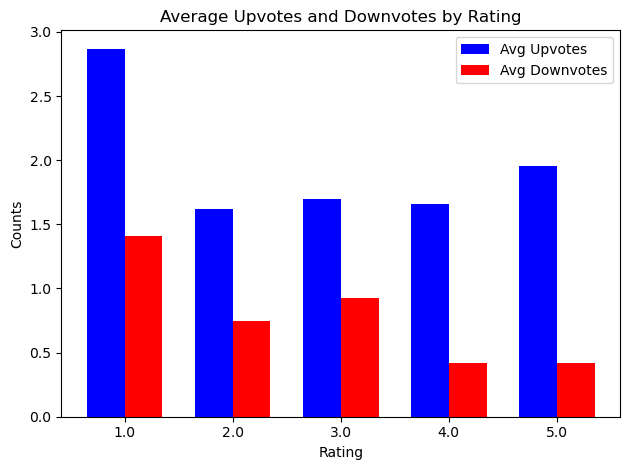

In [10]:
df = pd.DataFrame(data1)
grouped = df.groupby('Rating').agg({
    'Review Upvotes': 'mean',
    'Review Downvotes': 'mean'
}).reset_index()
bar_width = 0.35
index = range(len(grouped['Rating']))
fig, ax = plt.subplots()
bar1 = ax.bar(index, grouped['Review Upvotes'], bar_width, label='Avg Upvotes', color='b')
bar2 = ax.bar([i+bar_width for i in index], grouped['Review Downvotes'], bar_width, label='Avg Downvotes', color='r')
ax.set_xlabel('Rating')
ax.set_ylabel('Counts')
ax.set_title('Average Upvotes and Downvotes by Rating')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(grouped['Rating'])
ax.legend()
plt.tight_layout()
plt.show()


 A visual representation of the average upvotes and downvotes for different ratings, provides a quick and interpretable way to compare these values across rating.

### Bar plot of Total Reviews per Rating

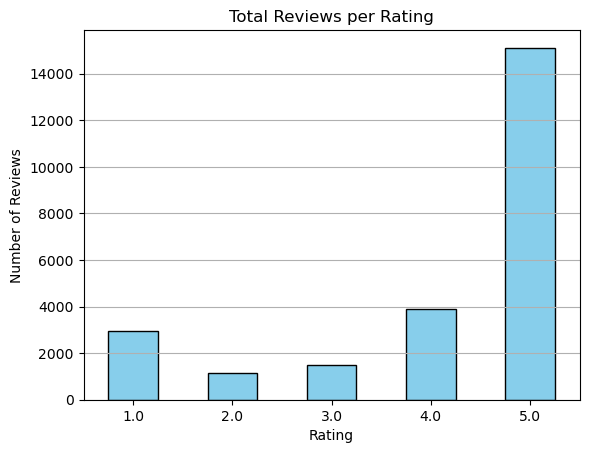

In [11]:
df = pd.DataFrame(data1)
rating_counts = df['Rating'].value_counts()
rating_counts.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Reviews per Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


The above bar plot represnts the distribuution of total reviews across different ratings, providing a quick overview of how many reviews fall into each rating category.

#### Most frequent words for each rating

In [13]:
pip install pandas matplotlib nltk

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akken\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


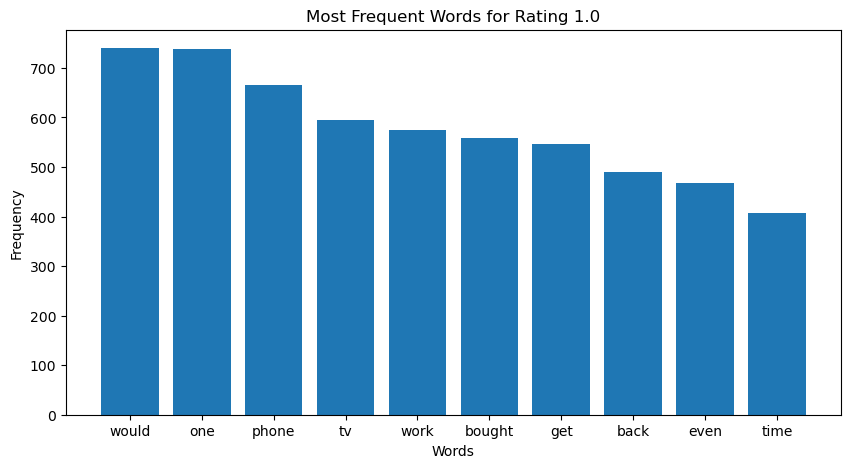

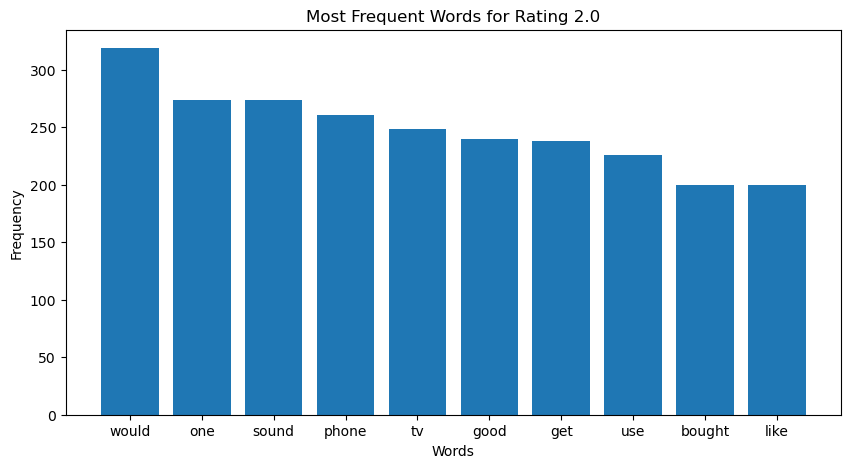

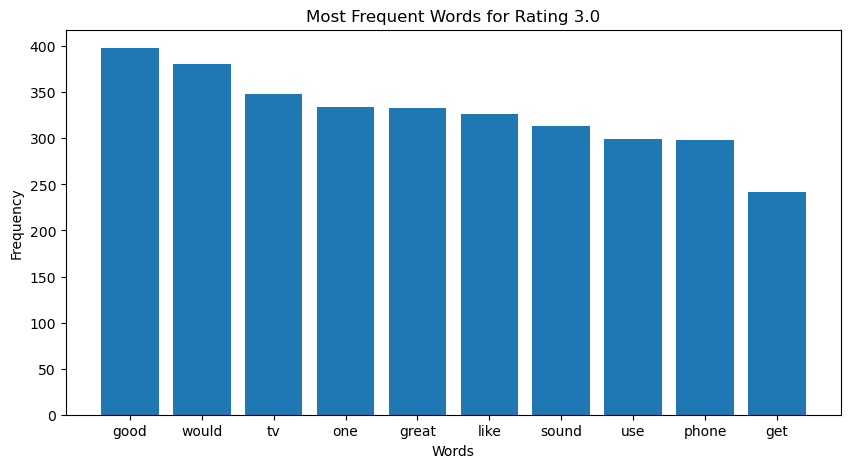

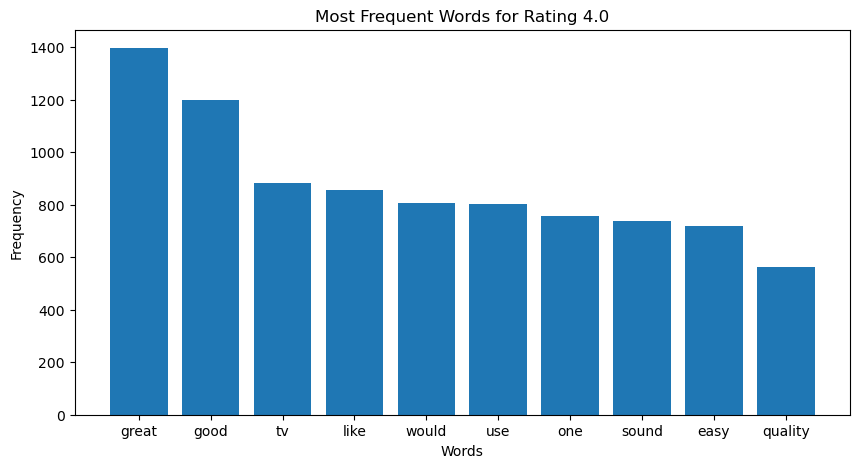

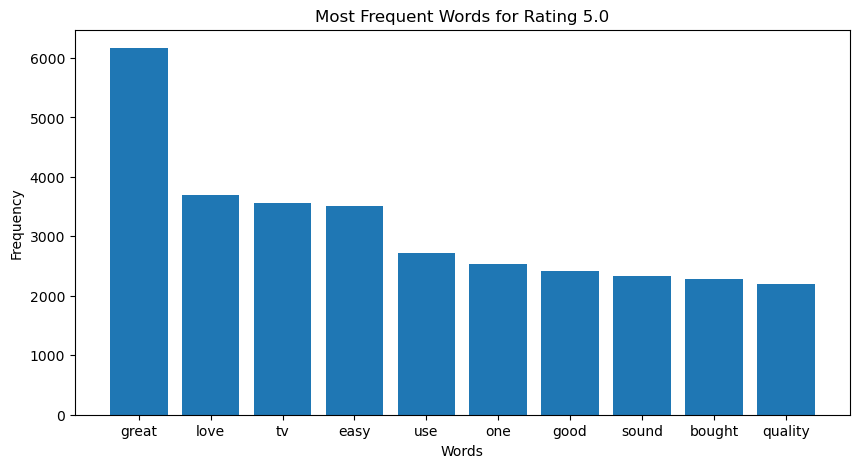

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens
data1 = data1.copy()
data1['tokens'] = data1['Review'].apply(preprocess_text)
word_counters = [Counter(tokens) for tokens in data1['tokens']]
word_counts_df = pd.DataFrame({'Rating': data1['Rating'], 'word_counts': word_counters})
word_counts_grouped = word_counts_df.groupby('Rating')['word_counts'].sum()
for rating, counts in word_counts_grouped.items():
    common_words = counts.most_common(10)
    words, frequencies = zip(*common_words)

    plt.figure(figsize=(10, 5))
    plt.bar(words, frequencies)
    plt.title(f'Most Frequent Words for Rating {rating}')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()

The above charts provides insights into the words that are most commonly used in reviews for each rating category, offering a glimpse into the language and sentiments associated with different product ratings.

### NLP Preprocessing

In [15]:
import nltk
nltk.download('punkt') 
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akken\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akken\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
def map_rating_to_sentiment(rating):
    if rating > 3:
        return 1 
    elif rating < 3:
        return 0  
    else:
        return None 
data1['Sentiment'] = data1['Rating'].apply(map_rating_to_sentiment)
data1 = data1.dropna(subset=['Sentiment'])


In [17]:
data1

,Uniq Id,Review,Review Upvotes,Review Downvotes,Rating,tokens,Sentiment
0,1800878dcfa5255c691f2a87ce8b2869,One star for looking nice. That’s it. After tr...,0,0,1.0,"[one, star, looking, nice, trying, trying, par...",0.0
1,ac06ca1b77310d539c9a74eed7a8a8e2,Love this phone so far have had it almost a mo...,9,3,4.0,"[love, phone, far, almost, month, bad, problem...",1.0
2,9c4b10fff4e5e2cc7e2e1bbed76e2220,This TV is absolutely fantastic. This is my th...,0,0,4.0,"[tv, absolutely, fantastic, third, tv, blows, ...",1.0
3,b5a5dc8de9fc0468aab961f097b56091,"Refurb, good shape, good price, does what I wa...",0,0,5.0,"[refurb, good, shape, good, price, want]",1.0
4,430433b52b882e540c16363d448e012b,Very nice tablet! Looks brand new. Fired right...,0,0,5.0,"[nice, tablet, looks, brand, new, fired, right...",1.0
...,...,...,...,...,...,...,...
29991,8d751eb9c8ed7cebcd0451861b1abe09,I'm pleased to say that the overall style fit ...,0,0,5.0,"[pleased, say, overall, style, fit, comfort, m...",1.0
29992,355d86361ed106ae2e3168c75f501f34,My son got it for me for christmas i love it i...,0,0,5.0,"[son, got, christmas, love, many, options]",1.0
29994,ed0fc14441b566c17cdf6a7d52ba1959,Ive had my t.v. since xmas. First thing that w...,0,0,1.0,"[ive, since, xmas, first, thing, messed, one, ...",0.0
29995,5a19ee1daaf4c1b4d9459afaafe61e7e,"Good value, quality product, easy to setup, no...",0,0,5.0,"[good, value, quality, product, easy, setup, c...",1.0


In [18]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')


def tokenize(text):
    return word_tokenize(text)
def to_lowercase(tokens):
    return [token.lower() for token in tokens]
def remove_special_characters(tokens):
    return [token for token in tokens if token.isalnum()]
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [token for token in tokens if token not in stop_words]
def stem(tokens):
    stemmer = PorterStemmer()
    return [stemmer.stem(token) for token in tokens]
def lemmatize(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token, pos='v') for token in tokens]
def preprocess_text(text):
    tokens = tokenize(text)
    tokens = to_lowercase(tokens)
    tokens = remove_special_characters(tokens)
    tokens = remove_stopwords(tokens)
    tokens = lemmatize(tokens)
    return ' '.join(tokens)
data1['processed_text'] = data1['Review'].apply(preprocess_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akken\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akken\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Feature Extraction along with model training and evaluation

#### Bag of words

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,3))
Bag_of_words_data = vectorizer.fit_transform(data1['processed_text'])


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(
    Bag_of_words_data, 
    data1['Sentiment'],  
    test_size=0.25, 
    random_state=42
)


In [21]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [22]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_bow_smote, y_train_bow_smote = smote.fit_resample(X_train_bow, y_train_bow)

In [25]:
positive_count = len(y_train_bow_smote[y_train_bow_smote == 1])
negative_count = len(y_train_bow_smote[y_train_bow_smote == 0])
print(f"Positive reviews: {positive_count}")
print(f"Negative reviews: {negative_count}")


Positive reviews: 14240
Negative reviews: 14240


#### Logistic Regression Model

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
logreg = LogisticRegression()
logreg.fit(X_train_bow_smote, y_train_bow_smote)
predictions = logreg.predict(X_test_bow)
print("Accuracy:", accuracy_score(y_test_bow, predictions))
print("\nClassification Report:")
print(classification_report(y_test_bow, predictions))


Accuracy: 0.8935802041875757

Classification Report:
              precision    recall  f1-score   support

         0.0       0.66      0.80      0.72      1007
         1.0       0.96      0.91      0.93      4772

    accuracy                           0.89      5779
   macro avg       0.81      0.86      0.83      5779
weighted avg       0.90      0.89      0.90      5779



C:\Users\akken\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Naive Bayes model

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
nb_model = MultinomialNB()
nb_model.fit(X_train_bow_smote, y_train_bow_smote)
nb_predictions = nb_model.predict(X_test_bow)
print("Accuracy of Naive Bayes:", accuracy_score(y_test_bow, nb_predictions))
print("\nClassification Report for Naive Bayes:")
print(classification_report(y_test_bow, nb_predictions))


Accuracy of Naive Bayes: 0.9067312683855339

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

         0.0       0.69      0.84      0.76      1007
         1.0       0.96      0.92      0.94      4772

    accuracy                           0.91      5779
   macro avg       0.83      0.88      0.85      5779
weighted avg       0.92      0.91      0.91      5779



#### SVM Model

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
svm_model = SVC()
svm_model.fit(X_train_bow_smote, y_train_bow_smote)
svm_predictions = svm_model.predict(X_test_bow)
print("Accuracy of SVM:", accuracy_score(y_test_bow, svm_predictions))
print("\nClassification Report for SVM:")
print(classification_report(y_test_bow, svm_predictions))


Accuracy of SVM: 0.872469285343485

Classification Report for SVM:
              precision    recall  f1-score   support

         0.0       0.67      0.54      0.60      1007
         1.0       0.91      0.94      0.92      4772

    accuracy                           0.87      5779
   macro avg       0.79      0.74      0.76      5779
weighted avg       0.86      0.87      0.87      5779



### TF-IDF Vectorizer

In [31]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(data1['processed_text'])
y = data1['Sentiment']
X_train_Tfidf, X_test_Tfidf, y_train_Tfidf, y_test_Tfidf = train_test_split(X, y, test_size=0.25, random_state=42)



In [32]:
smote_tdidf = SMOTE(random_state=42)
X_train_Tfidf_smote, y_train_Tfidf_smote = smote_tdidf.fit_resample(X_train_Tfidf, y_train_Tfidf)

#### Logistic Regression

In [33]:
logreg_Tfidf = LogisticRegression()
logreg_Tfidf.fit(X_train_Tfidf_smote, y_train_Tfidf_smote)
predictions = logreg_Tfidf.predict(X_test_Tfidf)
print("Accuracy:", accuracy_score(y_test_Tfidf, predictions))
print("\nClassification Report:")
print(classification_report(y_test_bow, predictions))


Accuracy: 0.9193632116283094

Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.86      0.79      1007
         1.0       0.97      0.93      0.95      4772

    accuracy                           0.92      5779
   macro avg       0.85      0.90      0.87      5779
weighted avg       0.93      0.92      0.92      5779



#### Naive Bayes

In [35]:
nb_model_Tfidf = MultinomialNB()
nb_model_Tfidf.fit(X_train_Tfidf_smote, y_train_Tfidf_smote)
nb_predictions_Tfidf = nb_model_Tfidf.predict(X_test_Tfidf)
print("Accuracy of Naive Bayes:", accuracy_score(y_test_Tfidf, nb_predictions_Tfidf))
print("\nClassification Report for Naive Bayes:")
print(classification_report(y_test_Tfidf, nb_predictions_Tfidf))


Accuracy of Naive Bayes: 0.8916767606852397

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

         0.0       0.64      0.88      0.74      1007
         1.0       0.97      0.89      0.93      4772

    accuracy                           0.89      5779
   macro avg       0.80      0.89      0.84      5779
weighted avg       0.91      0.89      0.90      5779



#### Random Forest

In [30]:
rf_model_Tfidf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_Tfidf.fit(X_train_Tfidf_smote, y_train_Tfidf_smote)
rf_predictions_Tfidf = rf_model_Tfidf.predict(X_test_Tfidf)
print("Accuracy of Random Forest:", accuracy_score(y_test_Tfidf, rf_predictions_Tfidf))
print("\nClassification Report for Random Forest:")
print(classification_report(y_test_Tfidf, rf_predictions_Tfidf))

Accuracy of Random Forest: 0.9063851877487454

Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       0.92      0.51      0.65      1007
         1.0       0.91      0.99      0.95      4772

    accuracy                           0.91      5779
   macro avg       0.91      0.75      0.80      5779
weighted avg       0.91      0.91      0.90      5779



### Using streamlit for web page creation

In [55]:
import joblib

joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(logreg_Tfidf, 'logreg_Tfidf.pkl')


['logreg_Tfidf.pkl']